# Notebook demonstrating the simulation code


In [1]:
import utils
import main
import subprocess
import matplotlib.pyplot as plt

In [19]:
#set up simulation
inner_death_rate = 0.01
outer_death_rate = 0.9
birth_rate = 0.61
driver_advantage = 0.5
treat_size = 500
radius = 25
model = "bdg_spatialDeath" #boundary driven growth, proliferative

params = {}
params['driver_advantage'] = driver_advantage
params['model'] = model
#death rate function
params['dr_function'] = 'radial_treatment'
#death rate function parameters
params['dr_params'] = {'treat_size':treat_size, 'inner_rate': inner_death_rate, 
'outer_rate': outer_death_rate, 'radius': radius} 
params['driver_rate'] = 1e-3 #100x empirical estimate 
params['br_params'] = {}
params['br_params']['init_rate'] = birth_rate
params['br_function'] = "one_changing" 
params["select_birth"] = True 
params['reps'] = 1
params['n_cells'] = 10000
params['time_save_interval'] = 5
params['exp_path'] = 'demo-output/timepoints' 

In [20]:
#run 
out = main.single_run(cur_rep = 0, kwargs = params)

starting sanity checks...
trying rep 0
size = 2382
size = 2593
size = 2906
size = 3461
size = 4061
size = 4816
size = 5528
size = 6257
size = 7003
size = 7770
size = 8500
size = 9162
size = 9862


demo-output/timepoints
List of csv files written to all_csv_files.txt
Concatenation complete. Result saved to demo-output/simulation-results.csv.
loading data
making comparison file
plotting clone frequencies for each replicate
Figure(700x700)
Figure(640x480)
done
done with everything


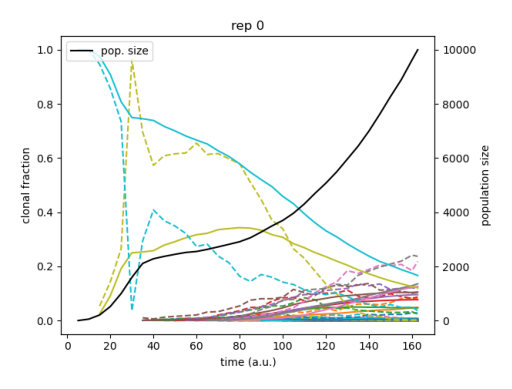

In [21]:
#collect timestep results
subprocess.run(["scripts/collect_results.sh","demo-output/timepoints"])
img = plt.imread("demo-output/postprocessed/figs/timeplot_rep_0.png",)
plt.imshow(img)
plt.axis("off")
plt.show()